The analysis shows that downtime has a stronger impact on efficiency than small variations in standard production rate.

In [10]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

from load_data import load_production_data
from metrics import calculate_metrics

import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = load_production_data("../data/production_data.csv")
df.head()


,date,operator_id,shift,total_time_min,downtime_min,spm,produced_units
0,2025-01-01,OP_01,Night,420,24,1.37,553
1,2025-01-01,OP_02,Night,450,84,1.23,435
2,2025-01-01,OP_03,Night,450,62,1.48,612
3,2025-01-01,OP_04,Evening,450,73,1.50,579
4,2025-01-01,OP_05,Evening,450,58,1.26,484


In [12]:
df_metrics = calculate_metrics(df)
df_metrics.head()


,date,operator_id,shift,total_time_min,downtime_min,spm,produced_units,effective_time_min,expected_units,efficiency_pct,downtime_pct
0,2025-01-01,OP_01,Night,420,24,1.37,553,396,542.52,101.931726,5.714286
1,2025-01-01,OP_02,Night,450,84,1.23,435,366,450.18,96.628015,18.666667
2,2025-01-01,OP_03,Night,450,62,1.48,612,388,574.24,106.575648,13.777778
3,2025-01-01,OP_04,Evening,450,73,1.50,579,377,565.50,102.387268,16.222222
4,2025-01-01,OP_05,Evening,450,58,1.26,484,392,493.92,97.991578,12.888889


## Efficiency Analysis

The following visualizations aim to identify performance differences between operators and shifts.


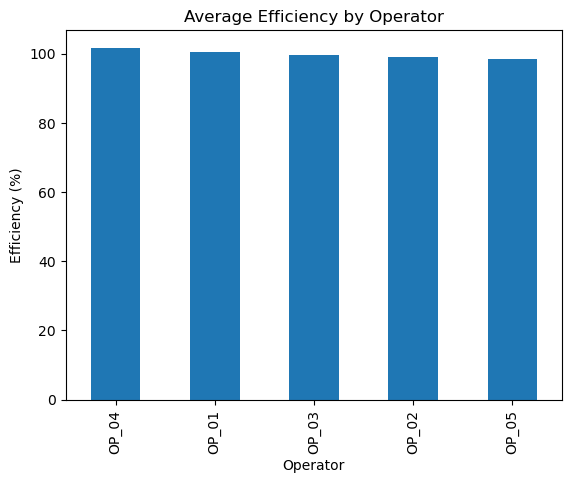

In [13]:
import matplotlib.pyplot as plt

eff_by_operator = (
    df_metrics
    .groupby("operator_id")["efficiency_pct"]
    .mean()
    .sort_values(ascending=False)
)

eff_by_operator.plot(kind="bar")
plt.title("Average Efficiency by Operator")
plt.ylabel("Efficiency (%)")
plt.xlabel("Operator")
plt.show()


This visualization highlights clear differences in average efficiency between operators.
Such variation may be related to downtime, shift assignment, or process differences.


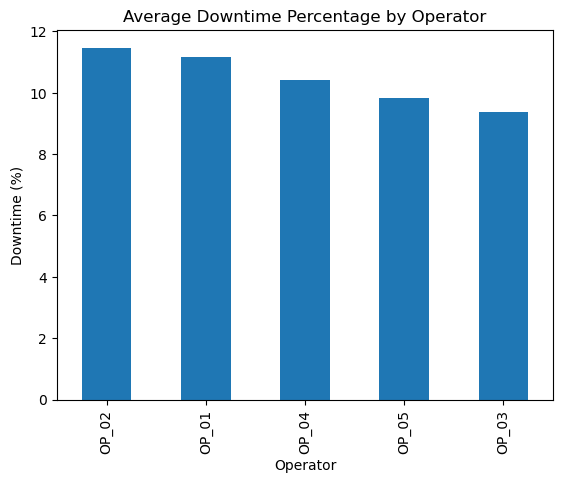

In [14]:
downtime_by_operator = (
    df_metrics
    .groupby("operator_id")["downtime_pct"]
    .mean()
    .sort_values(ascending=False)
)

downtime_by_operator.plot(kind="bar")
plt.title("Average Downtime Percentage by Operator")
plt.ylabel("Downtime (%)")
plt.xlabel("Operator")
plt.show()


### Interpretation

This visualization highlights differences in average downtime percentage between operators.

Higher downtime directly reduces effective production time, which impacts expected output and overall efficiency. Operators with elevated downtime percentages may require further investigation into machine reliability, process interruptions, or workflow organization.

Reducing downtime could generate a greater performance improvement than increasing production speed alone.


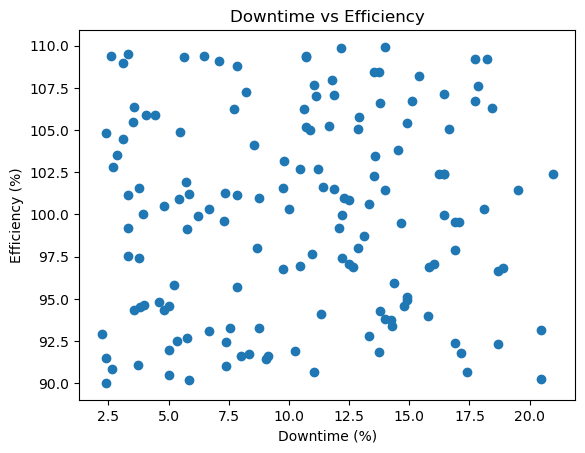

In [15]:
plt.scatter(df_metrics["downtime_pct"], df_metrics["efficiency_pct"])
plt.title("Downtime vs Efficiency")
plt.xlabel("Downtime (%)")
plt.ylabel("Efficiency (%)")
plt.show()


### Interpretation

The scatter plot illustrates the relationship between downtime percentage and efficiency.

A generally inverse relationship can be observed: as downtime increases, efficiency tends to decrease. However, some observations deviate from this trend, suggesting that other variables such as operator skill or process conditions may also influence performance.

This reinforces the importance of analyzing operational metrics holistically rather than relying on a single indicator.


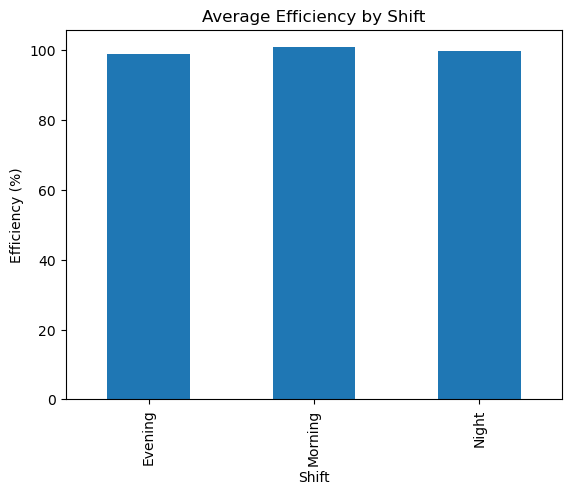

In [16]:
eff_by_shift = (
    df_metrics
    .groupby("shift")["efficiency_pct"]
    .mean()
)

eff_by_shift.plot(kind="bar")
plt.title("Average Efficiency by Shift")
plt.ylabel("Efficiency (%)")
plt.xlabel("Shift")
plt.show()


### Interpretation

This chart compares average efficiency across different shifts.

Differences between shifts may indicate variations in supervision, fatigue levels, staffing structure, or machine conditions. If a specific shift consistently underperforms, targeted operational improvements could be implemented.

Shift-level analysis is critical for identifying structural performance patterns beyond individual operator behavior.


## Overall Conclusion

The analysis demonstrates that downtime has a measurable impact on operational efficiency. While operator performance varies, structural factors such as downtime management and shift conditions appear to significantly influence results.

Improving operational efficiency should prioritize downtime reduction strategies and process optimization rather than focusing solely on increasing production rate (SPM).

This approach ensures performance improvements are sustainable and data-driven.
